We've noted that some games resist a simple analysis in terms of best responses because of uncertainty about how the opponent will play.  Let's now develop an analysis of this kind of situation.

We'll begin with a game of imperfect information where the player's interests are opposed, a "winning game."

We'll use version of a game presented in von Neumann and Morgenstern, the Holmes-Moriarty game, which is in turn inspired by a Sherlock Holmes short-story, "The Final Problem."  I've drawn this from (Owen Sims)[https://imowensims.wordpress.com/2016/01/02/sherlock-holmes-and-the-final-problem-a-game-of-pure-conflict/].

Holmes is being pursued by Prof. Moriarty, who intends to do him in.  Holmes reasons that if he can make it to Dover, he can catch a boat to the mainland, where he will have a good chance of evading his nemesis.

Holmes and Watson catch a train for Dover, but as the train is leaving the station, they see Prof. Moriarty on the platform.  No doubt, Moriarty will pursue them.  Holmes reasons that they can stay on the train to Dover, but if they do, their chance of evading Moriarty decreases since he might catch them before they can escape by boat.  They can get off the train at Canterbury and find an alternative method of getting to the continent, but there is still a chance that Moriarty might catch them.  Indeed, Moriarty might outguess Holmes can get off at Canterbury as well, in which case his chances of catching Holmes are greatly improved.

We can show the strategic situation as a game of imperfect information, where each player must make his choice in the absence of information about his opponent's choice:

<img src='HolmesMoriarty01.png' \>

Some facts to note:

1. We've modeled the situation as a __constant sum game__.  The payoffs in each cell of the matrix always sum to the same number, in this case 100.  
2. A best repsonse analysis shows that this game is a lightly disguised version of a Hide and Seek game.  Let's do the analysis. 

Turning first to Holmes, we note that he wants to avoid coordinating with Moriarty.  So his best responses are:

<img src='HolmesMoriarty02.png' \>

Clearly, Holmes doesn't want to coordinate with Moriarty!  This is quite different from Moriarty's best responses; he obviously wants to coordinate with Holmes:

<img src='HolmesMoriarty03-new.png' \>

Combining Holmes' best responses with Moriarty's best responses reveals that there is no pure strategy equilibrium for the game:

<img src='HolmesMoriarty04.png' \>

This is unsurprising.  Holmes and Moriarty have conflicting interests, so we wouldn't expect there to be a pure strategy solution to this game.  

What to do?

Holmes might try a probability distribution over playing __Dover__ and __Canterbury__.   In particular, Holmes' wants to find his __maximin strategy__:

>A maximin strategy maximizes a player’s payoff, given that the other players are expected to respond by choosing strategies to minimize that player’s payoff.

Holmes decides to let $p$ be the probability that he gets off the train at Dover, so $(1 - p)$ is the probability that he gets off at Canterbury.

Now Holmes assumes that  Moriarty gets off at Dover.  Holmes' expected utility is:

$$ 20p + 70(1 - p) = 70 - 50p $$

Now suppose that Moriarty decides to get off at Canterbury.  Holmes' expected utility in that case is:

$$ 90p + 10(1 - p) = 80p + 10 $$

Set the expected utility for either choice to be the same and solve for $p$:

$$ 70 - 50p = 80p + 10 $$
$$ 70  = 130p + 10 $$
$$ 60 = 130p $$
$$ p = \frac{6}{13} $$

So Holmes should get off at Dover with a probability of $\frac{6}{13}$.

In [20]:
70 - (50 * (6 / 13))

46.92307692307692

In [21]:
(80 * (6 / 13)) + 10

46.92307692307693

<IPython.core.display.Javascript object>


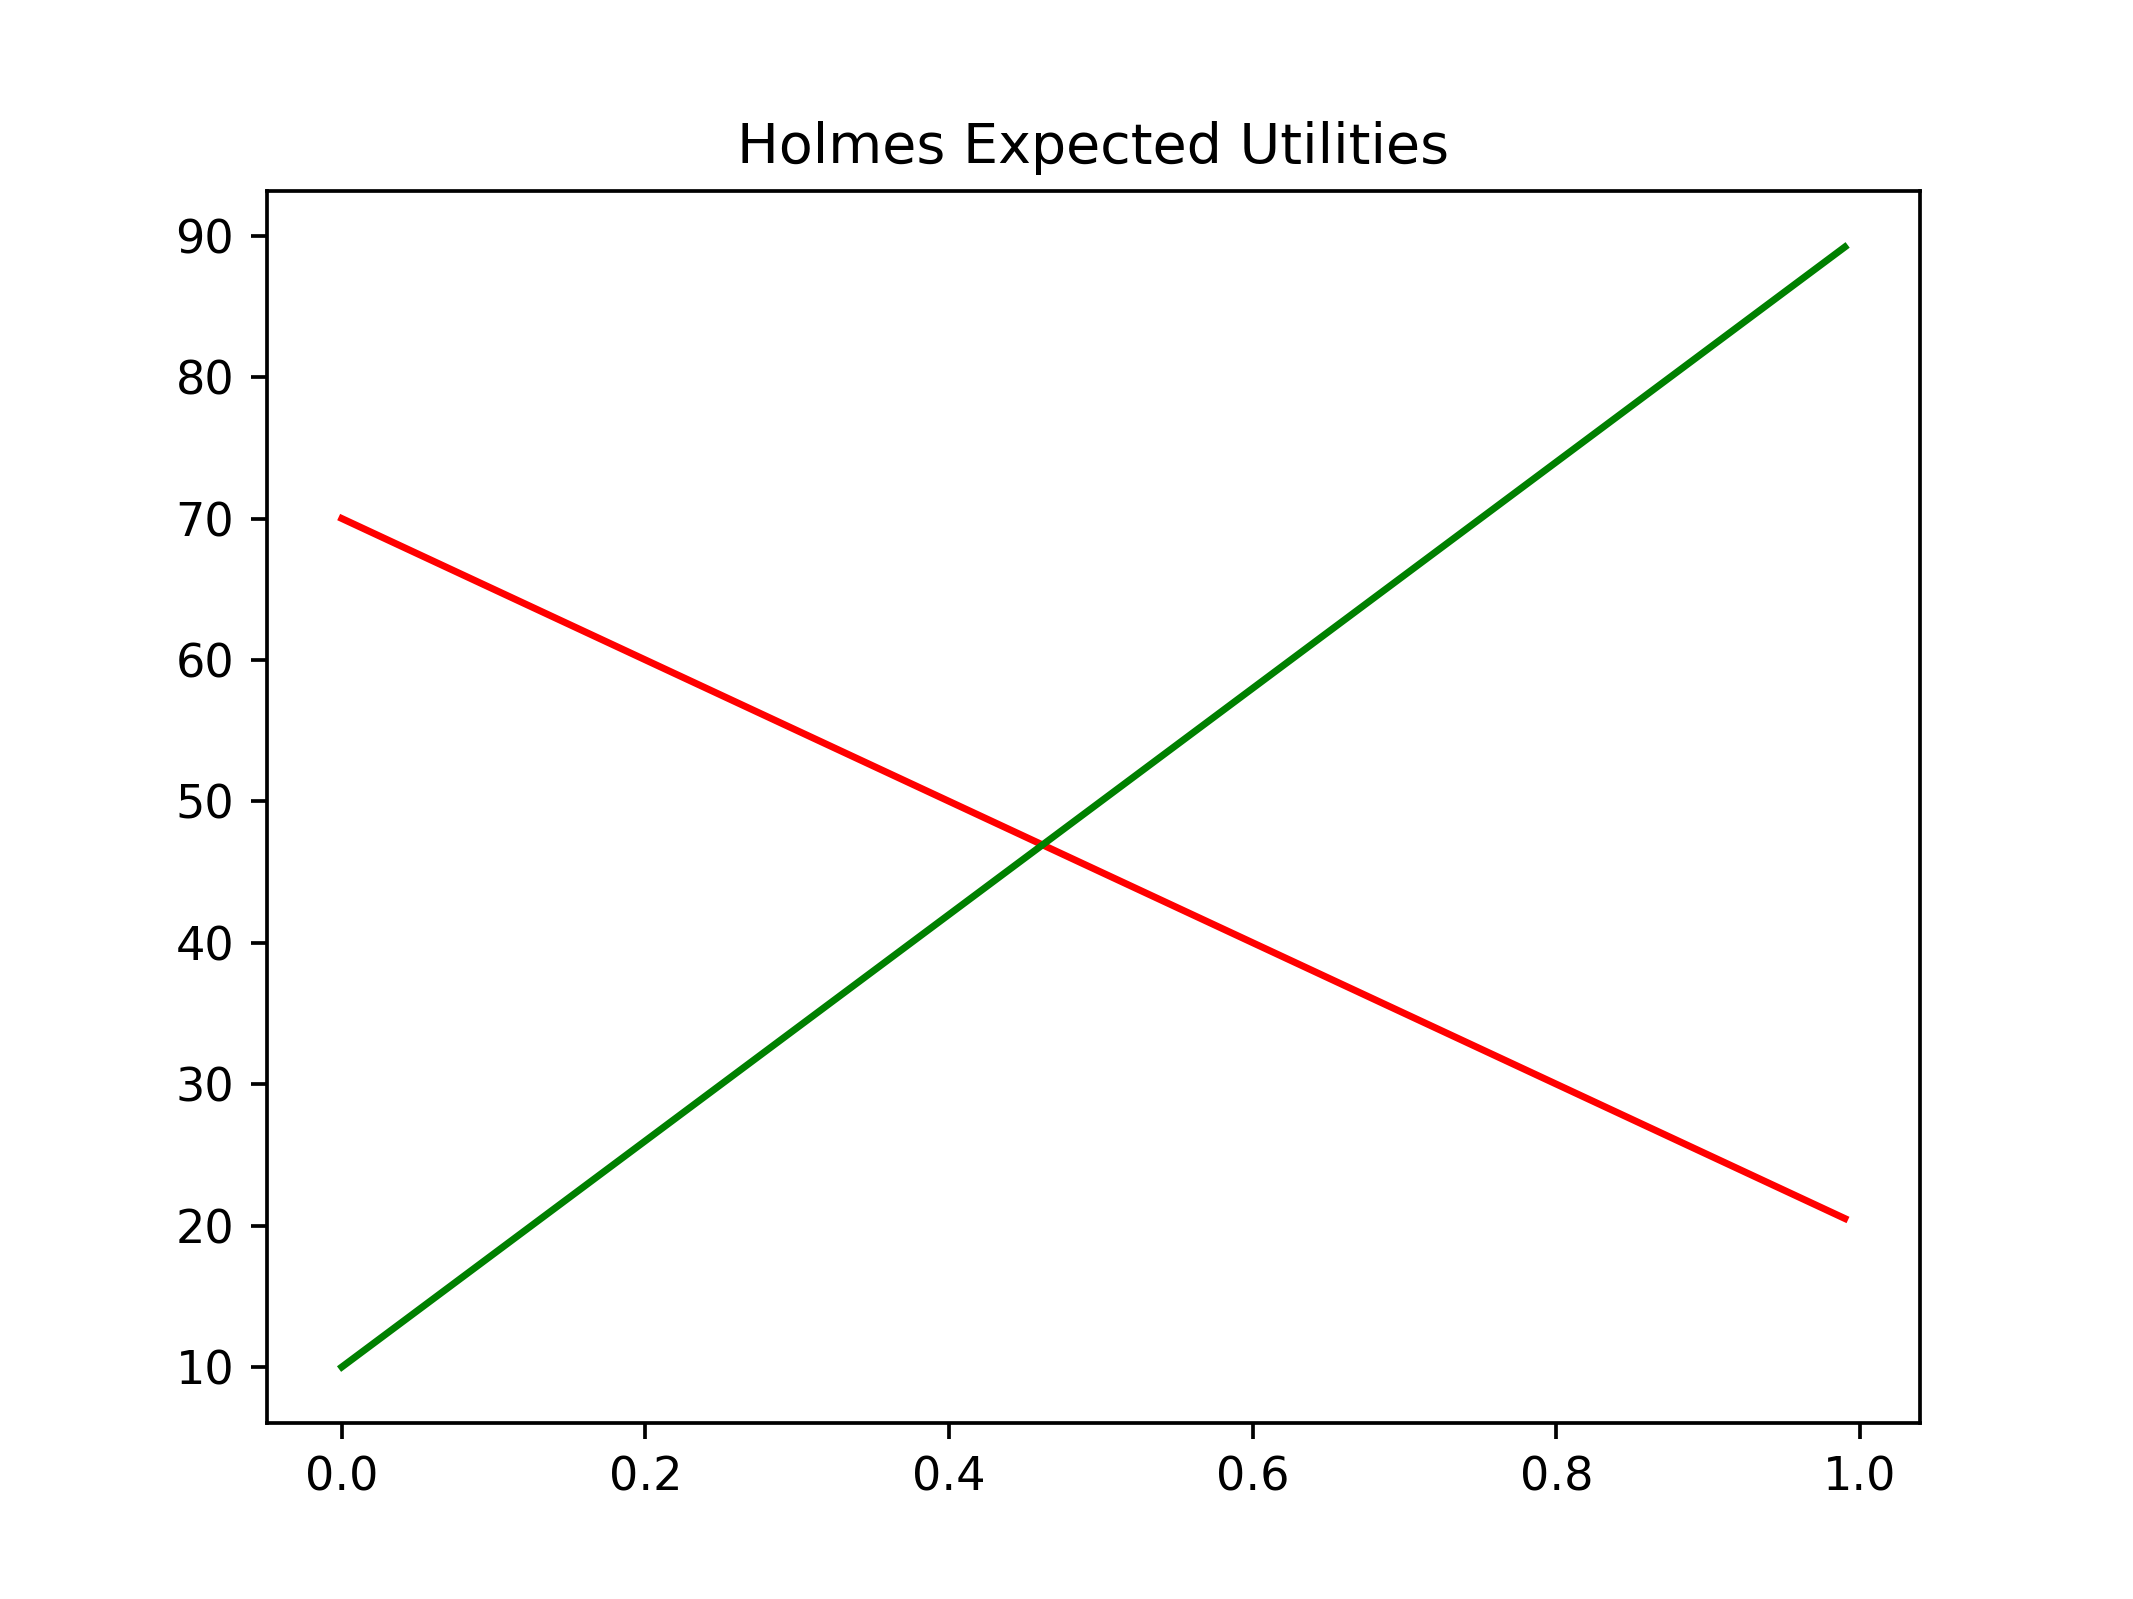

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

def frange(start, final, interval):
    
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
        
    return numbers

x = frange(0,1.0,0.01)

def dover(list):
    
    result = []
    for x in list:
        new = 70 - (50 * x)
        result.append(new)
        
    return result

def canterbury(list):
    
    result = []
    for x in list:
        new = (80 * x) + 10
        result.append(new)
    
    return result
    
dover = dover(x)
canterbury = canterbury(x)

def draw_holmes(strategy1,strategy2,xAxis):
    p1, = plt.plot(xAxis,strategy1,color='r')
    p2, = plt.plot(xAxis,strategy2,color='g')
    plt.title('Holmes Expected Utilities')
   
               
draw_holmes(dover,canterbury,x)

plt.savefig('Fig01.png')

#plt.show()

What's going on here?  Holmes has chosen the probability where his expected utility for getting off at Dover is the same as that for Canterbury.  This is his maximum minimum payoff.

We can proceed with a similar analysis for Moriarty.  In this case, suppose that $q$ is the probability that Moriarty gets off Dover and $(1 - q)$ the probability that he gets off at Canterbury.  

Suppose Moriarty knows that Holmes gets off at Dover; his expected utility is:

$$ 80q + 10(1 - q) = 70q + 10 $$

Now suppose Moriarty knows that Holmes gets off at Canterbury; his expected utility in this case is:

$$ 30q + 90(1 - q) = 90 - 60q $$

Set them equal and solve for $q$:

$$ 70q + 10 = 90 - 60q $$
$$ 130q = 80$$
$$ \frac{80}{130} = \frac{8}{13} $$

So Moriarty should get off at Dover with a probability of $\frac{8}{13}$.

In [23]:
(70 * (8 /13)) + 10

53.07692307692308

In [24]:
90 - (60 * (8 / 13))

53.07692307692307

<IPython.core.display.Javascript object>


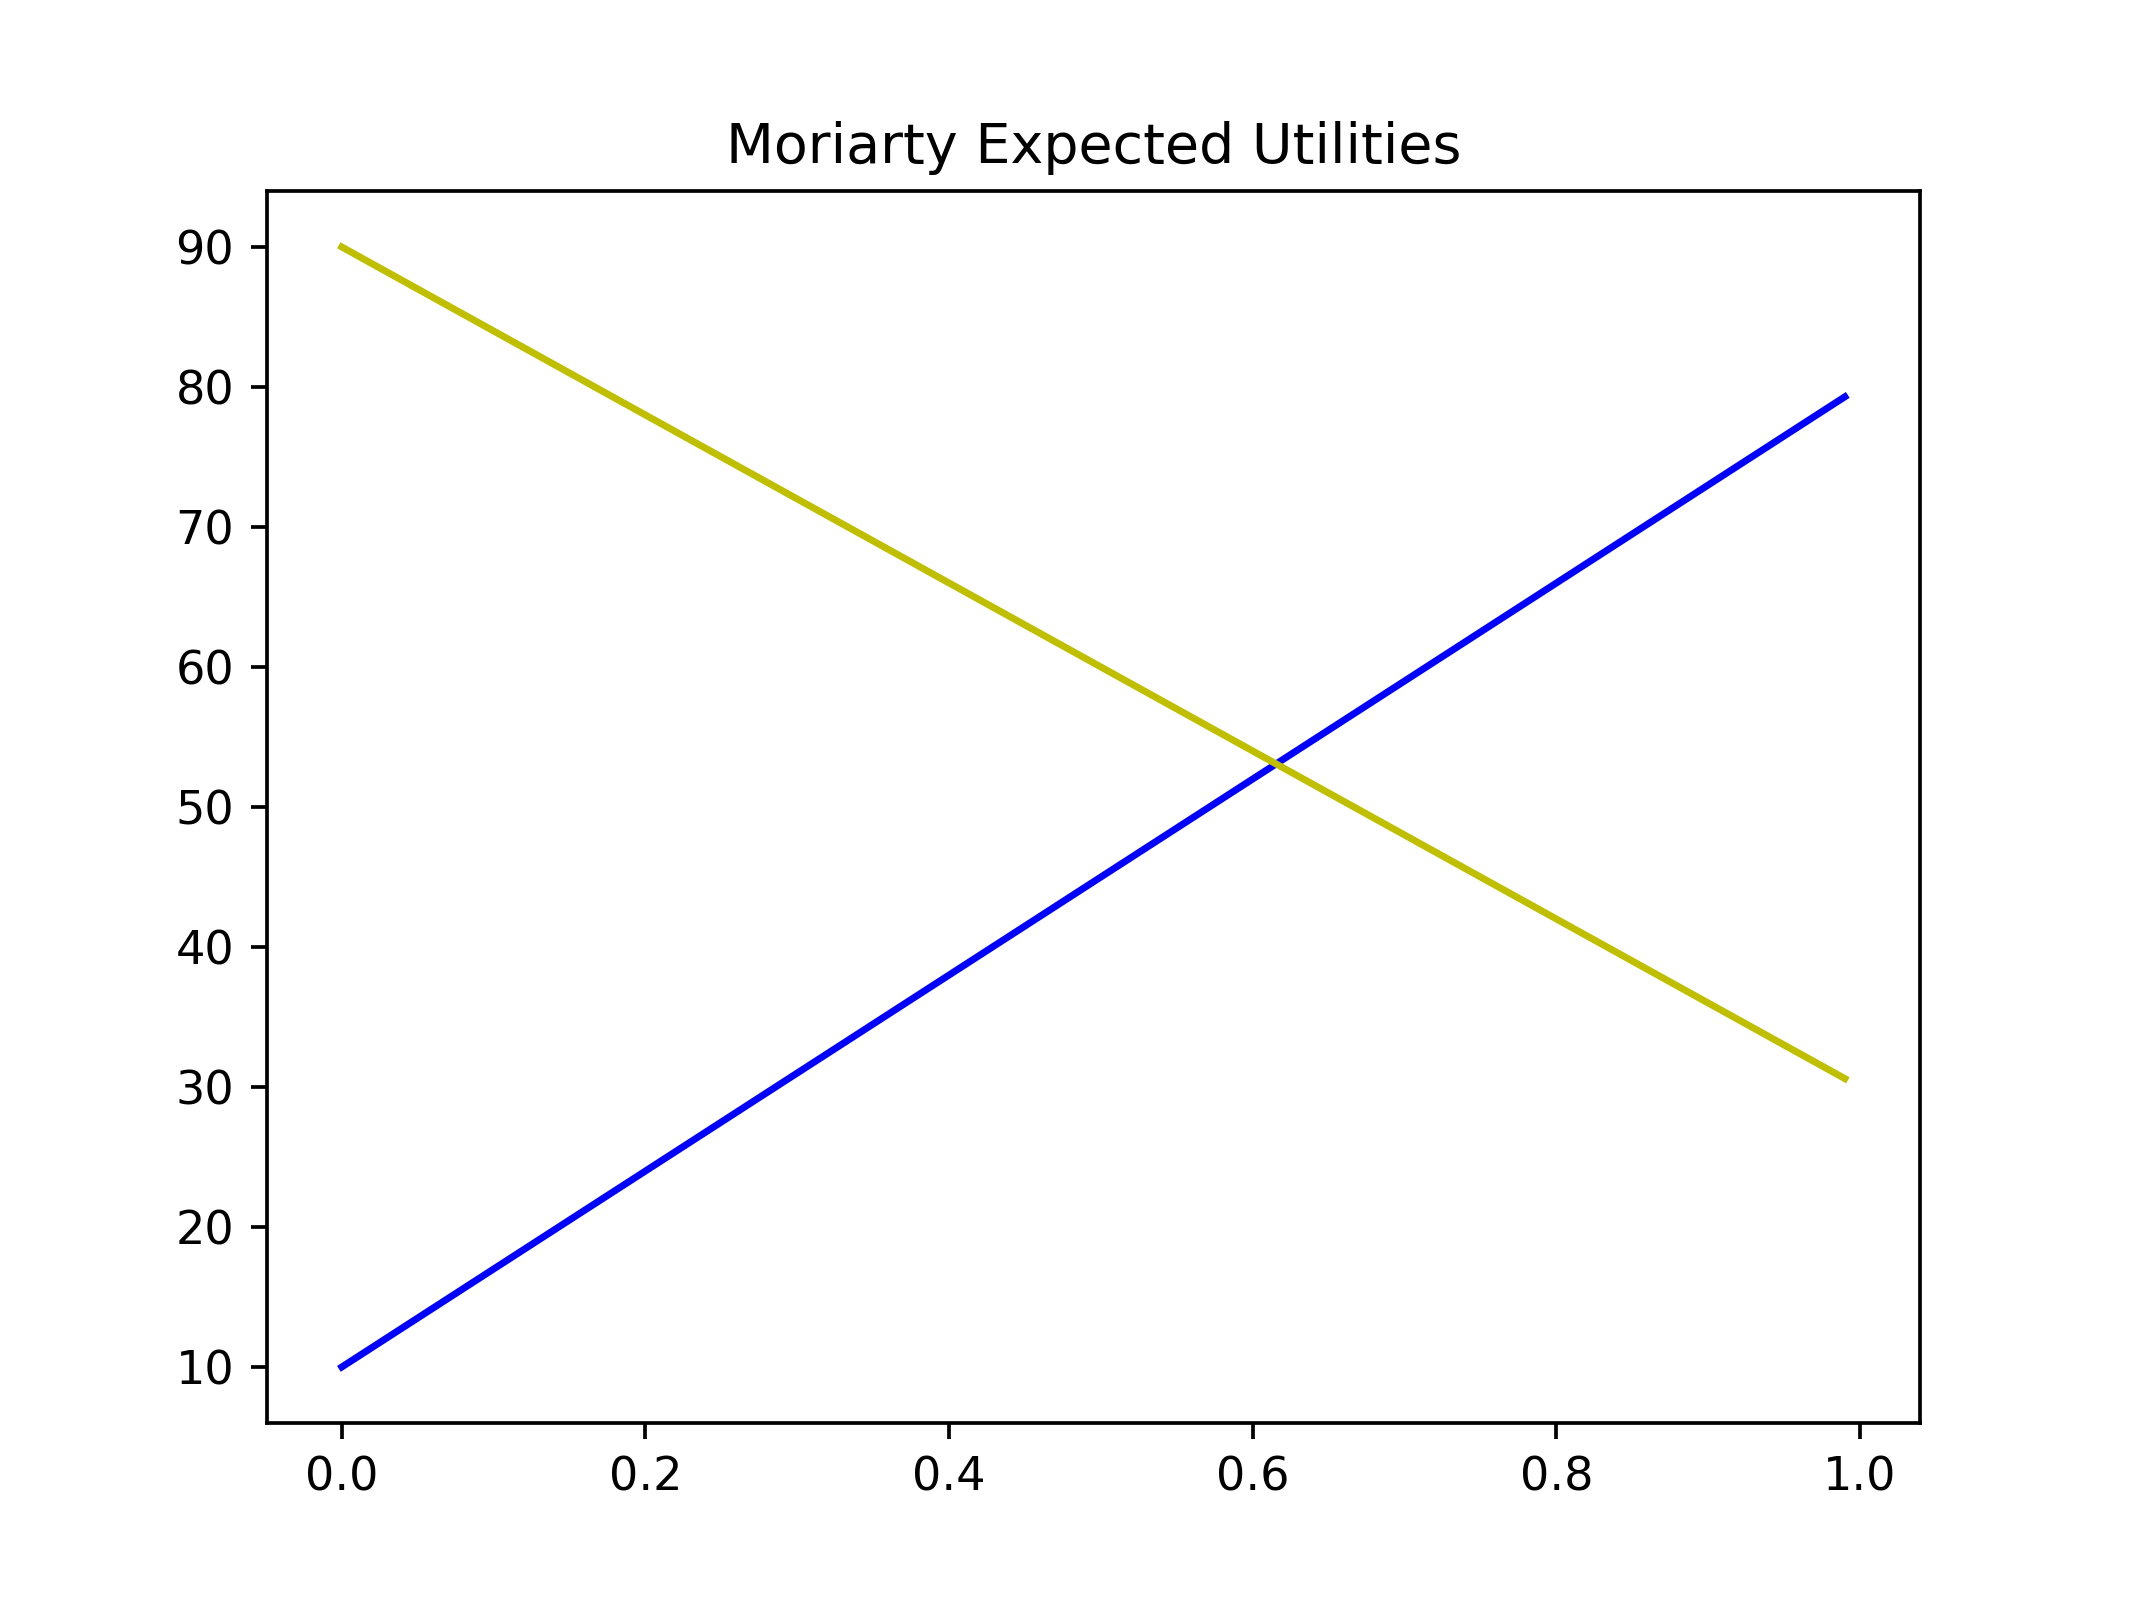

In [42]:
def doverMoriarty(list):
    
    result = []
    for x in list:
        new = (70 * x) + 10
        result.append(new)
        
    return result

def canterburyMoriarty(list):
    
    result = []
    for x in list:
        new = 90 - (60 * x) 
        result.append(new)
    
    return result
    
dover = doverMoriarty(x)
canterbury = canterburyMoriarty(x)

def draw_moriarty(strategy1,strategy2,xAxis):
    p1, = plt.plot(xAxis,strategy1,color='b')
    p2, = plt.plot(xAxis,strategy2,color='y')
    plt.title('Moriarty Expected Utilities')
   
               
draw_moriarty(dover,canterbury,x)

plt.savefig('Fig02.png')

plt.show()

How often do Holmes and Moriarty meet at Dover?

In [26]:
(6 / 13) * (8 / 13)

0.28402366863905326

If they do the experiment 100 times

In [27]:
100 * ((6 / 13) * (8 / 13))

28.402366863905325

How often do they meet in Canterbury?

In [28]:
(1 - (6 /13)) * (1 - (8 / 13))

0.2071005917159763

In [29]:
(7 /13) * (8 /13)

0.33136094674556216

In [30]:
(5 / 13) * (8 /13)

0.2366863905325444

So 100 repetitions of the experiment give:

In [31]:
100 * ((1 - (6 /13)) * (1 - (8 / 13)))

20.71005917159763

How about a BoS game.  Unlike Holmes-Moriarty, where interests are opposed, the players in a BoS game have partially aligned interests:

   <img src='BoS.png' />

To figure out the utility for Adam, let's actually take a look at Eve's preferences.  Suppose that Eve picks gin.  Her utility will depend on Adam's choice; let $p$ be the probability of choosing gin.  In that case, he gets:

$$ 2p + (0 \times (1 - p)) = 2p $$

If Eve chooses vodka, then her opponent gets:

$$ (0 \times p) + (1 \times (1 - p)) = 1 - p $$

Eve wants Adam to be indifferent so she sets the two utility equations equal and get:

$$ 2p = 1 - p $$
$$ 3p = 1 $$
$$ p = \frac{1}{3} $$

So she should choose gin $\frac{1}{3}$ of the time and vodka $\frac{2}{3}$ of the time.  This is the point at which she maximizes her minimum payoff.

Adam's mix is, of course, the mirror image of Eve's.  He should choose gin $\frac{2}{3}$ of the time and vodka $\frac{1}{3}$ of the time.

How often do they drink gin together?  Well, $\frac{2}{9}$ of the time.

In [34]:
(1 / 3) * (2 / 3)

0.2222222222222222

How often do they drink vodka together?  Exactly the same frequency!

In [35]:
(1 - (1 / 3)) * (1 - (2 / 3))

0.22222222222222227

If they jointly choose gin $\frac{2}{9}$ of the time and jointly choose vodka $\frac{2}{9}$ of the time, then what are their expected utilities.

Since Adam prefers gin (2 points) and they get gin $\frac{2}{9}$ of the time; he get 1 point for vodka, which happens $\frac{2}{9}$. So his expected utility is:

$$ (2 \times \frac{2}{9}) + (1 \times \frac{2}{9}) = \frac{6}{9} = \frac{2}{3} $$

It's easy to see (and prove) that Eve's expected utility is exactly $\frac{2}{3}$ as well.

Since we're in an equilibrium state, neither player will prefer to defect from their mixed strategy.  If Adam unilaterally increases his probability of choosing gin, he actually does less well:

In [36]:
0.4 * (1/3)

0.13333333333333333

This all seems fair, but somewhat less than optimal.  You might think that they would do better if they each flipped a coin and chose one option or another with probability $0.5$.  Arguably, the players would drink gin $0.5 \times 0.5 = 0.25$, that is 25 percent of the time, they will drink vodka with the same frequency, 25 percent of the time.  And they will drink together $0.25 + 0.25 = 0.5$, 50 percent of the time.  Awesome!

Did game theory somehow get things wrong?  It seems that the players are happier with the above mix, so what's the deal?

The problem is that the 50-50 split is not an equilibrium.  A player can unilaterally defect and do better.  To see this, suppose that Eve plays the 50-50 split, but Adam decides to go for a 70-30 split in favor of gin. In that case, he gets gin 35 percent of the time, which he considers even more awesome than 25 percent of the time:

In [51]:
(7 / 10) * (5 / 10)

0.35

Of course, Eve doesn't do quite as well:

In [52]:
(3 / 10) * (5 / 10)

0.15

Note, though, that they still get to drink together $0.35 + 0.15 = 50$, that is 50 percent of the time. Adam likes this outcome a lot (Eve not so much). 

This is adequate to show that the 50-50 split is not an equilibrium.

How about a simple coordination game:

<img src='coordination_game.png' \>

We only need to consider one agent, let's say Eve, because the payoffs converge.  Let $p$ be the probability that Eve selects __Dove__ (so $(1 - p)$ is the probability of her selecting __Hawk__).  Supposing once again that Adam selects __Dove__, her expected utility is:

$$ (1 \times p) + (0 \times (1 - p)) = p $$

Supposing Adam selects __Hawk__, her expected utility is:

$$ (0 \times p) + (1 \times (1 - p)) = 1 - p $$

Setting the two equations equal:

$$ p = 1 - p$$
$$ 2p = 1$$
$$ p = 1/2 $$

Let's do the graph!

<IPython.core.display.Javascript object>


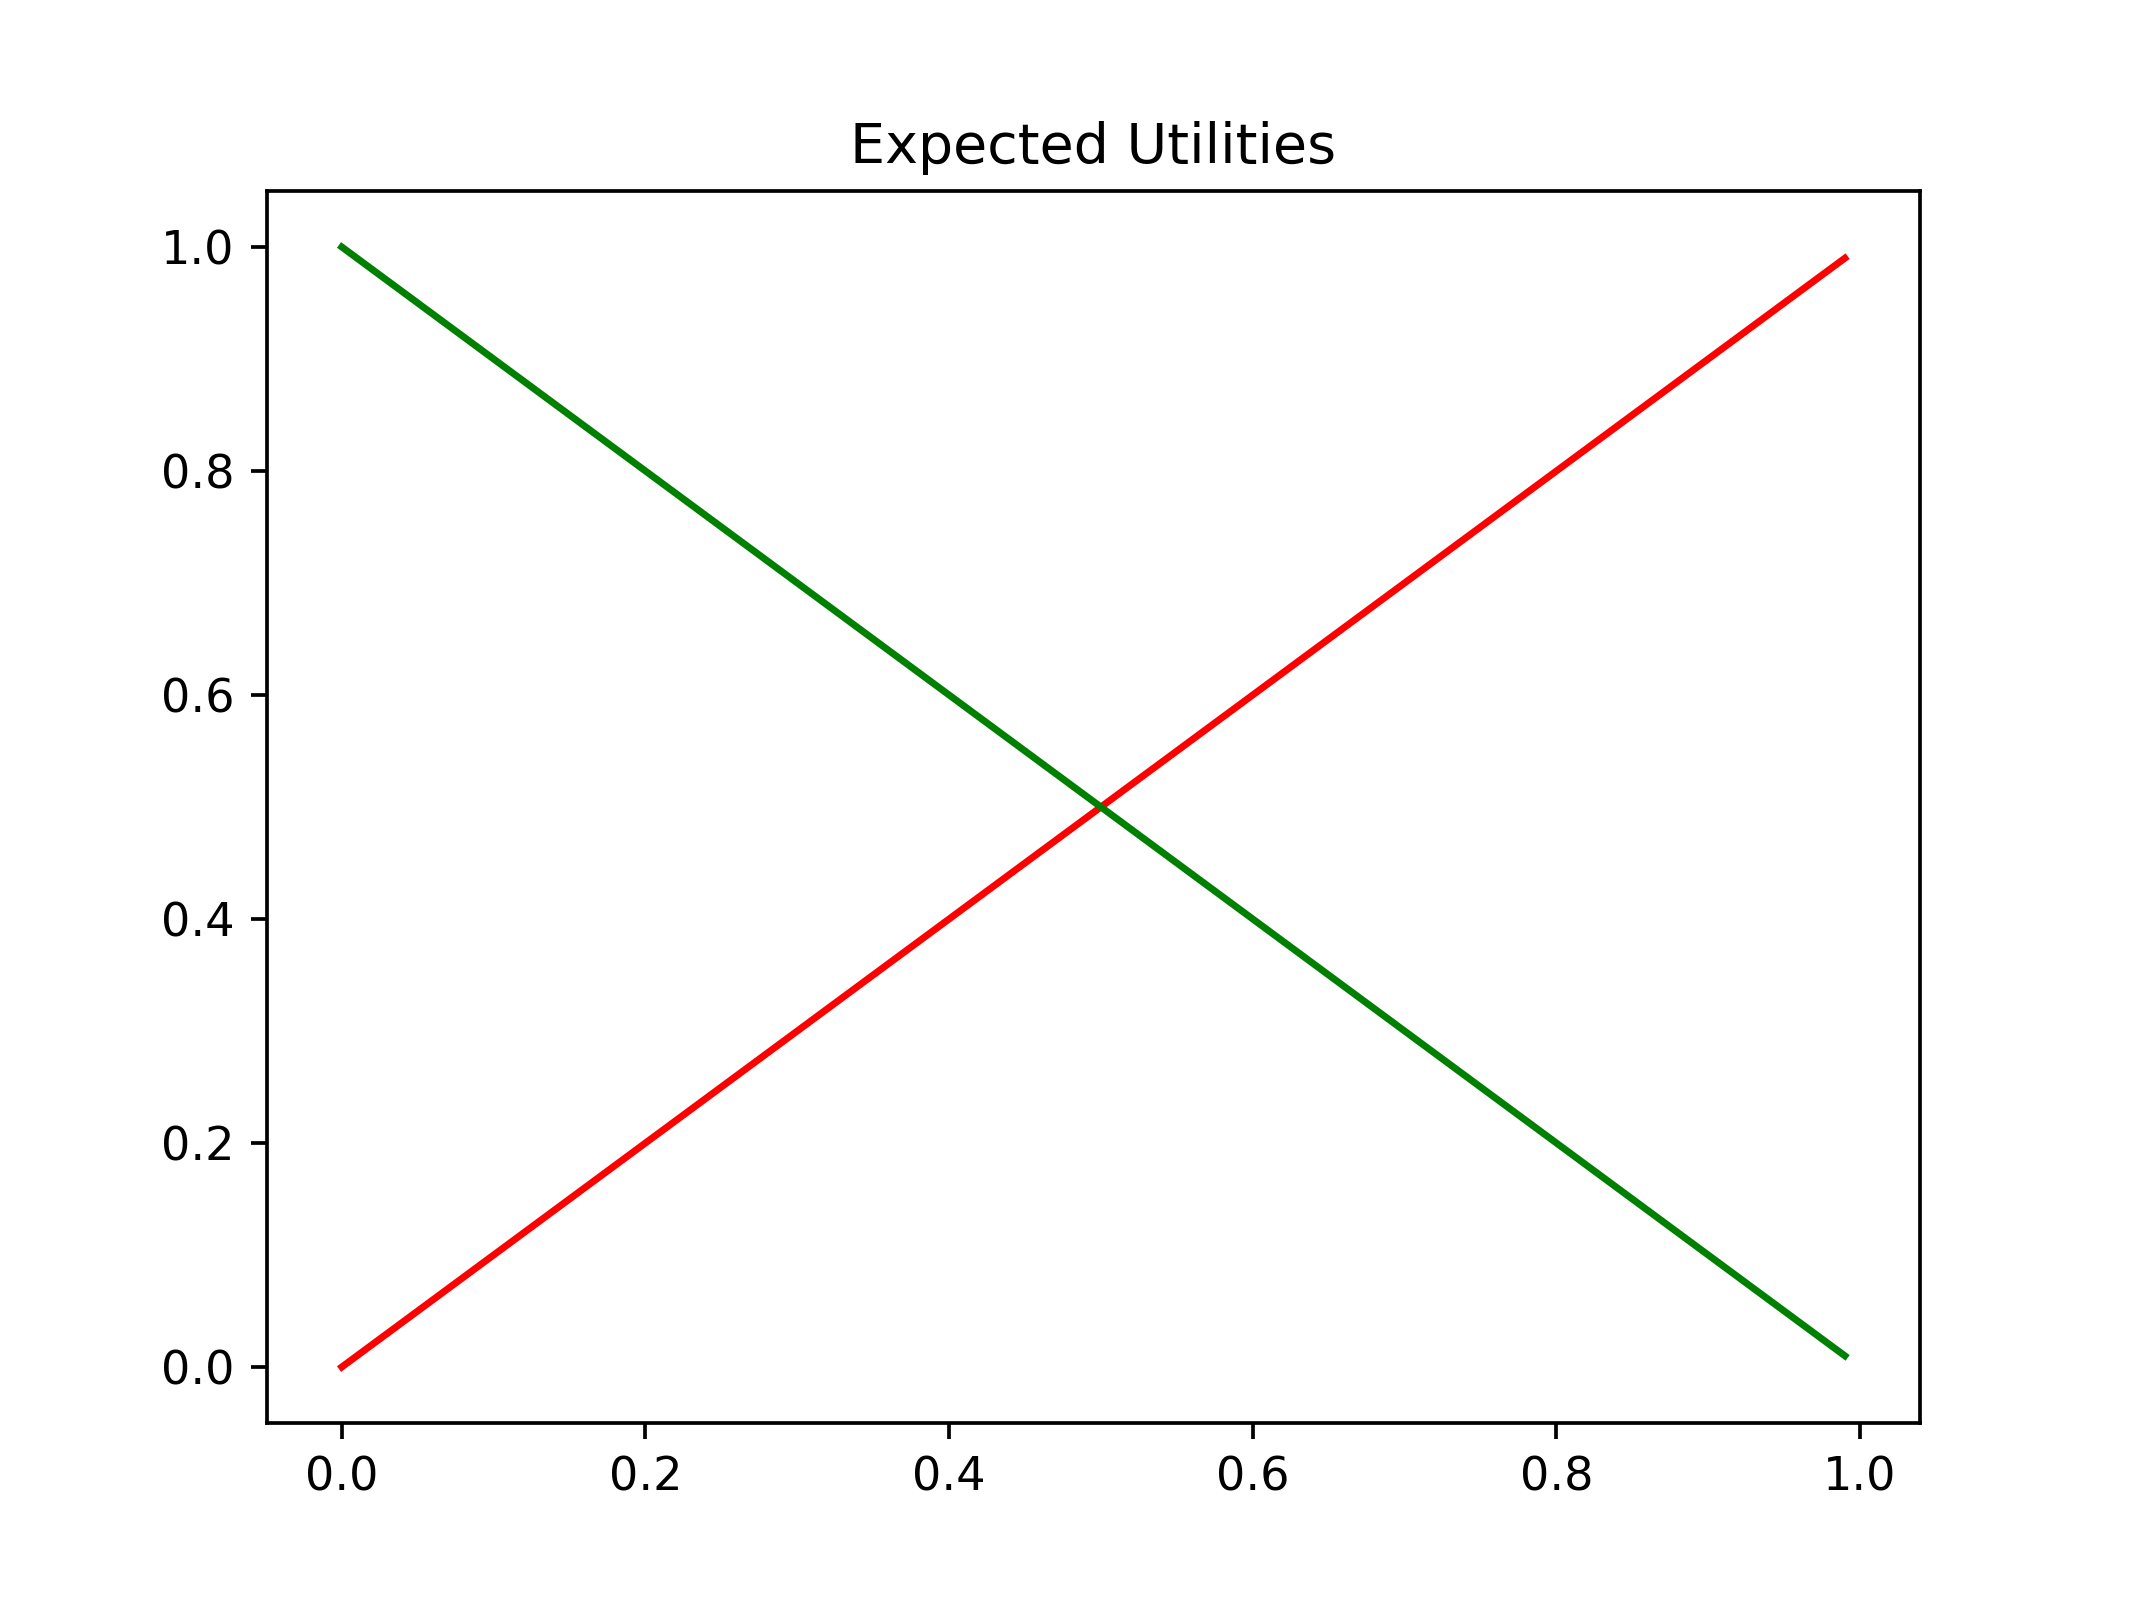

In [45]:
def doveEve(list):
    
    result = []
    for x in list:
        new = x
        result.append(new)
        
    return result

def hawkEve(list):
    
    result = []
    for x in list:
        new =  1 - x
        result.append(new)
    
    return result
    
dove = doveEve(x)
hawk = hawkEve(x)

def draw_coordination(strategy1,strategy2,xAxis):
    p1, = plt.plot(xAxis,strategy1,color='r')
    p2, = plt.plot(xAxis,strategy2,color='g')
    plt.title('Expected Utilities')
   
               
draw_coordination(dove,hawk,x)

plt.savefig('Fig05.png')

plt.show()

How should we interpret the above?  Suppose Eve is set down in an environment where she is perfectly unsure of what her counterpart will do.  She has no reason to suppose that he will choose one outcome more than another.  Then she can do no better than to do a 50-50 split for her choice.

What about coordination around a focal point?

<img src='Focal_Coordination.png' />

Once again, the game is perfectly symmetrical, so we need only worry about one player, this time Adam.

Let $p$ be the probability that Adam selects __Dove__.  Supposing that Eve selects __Dove__, Adam's expected utility is:

$$ (2 \times p) + (0 \times (1 - p)) = 2p $$

Suppose Eve selects __Hawk__, then Adam's expected utility is:

$$ (0 \times p) + (1 \times (1 - p)) = 1 - p $$

Setting the two equations equal:

$$ 2p = 1 - p $$
$$ 3p = 1 $$
$$ p = \frac{1}{3} $$

We want more graphs!

<IPython.core.display.Javascript object>


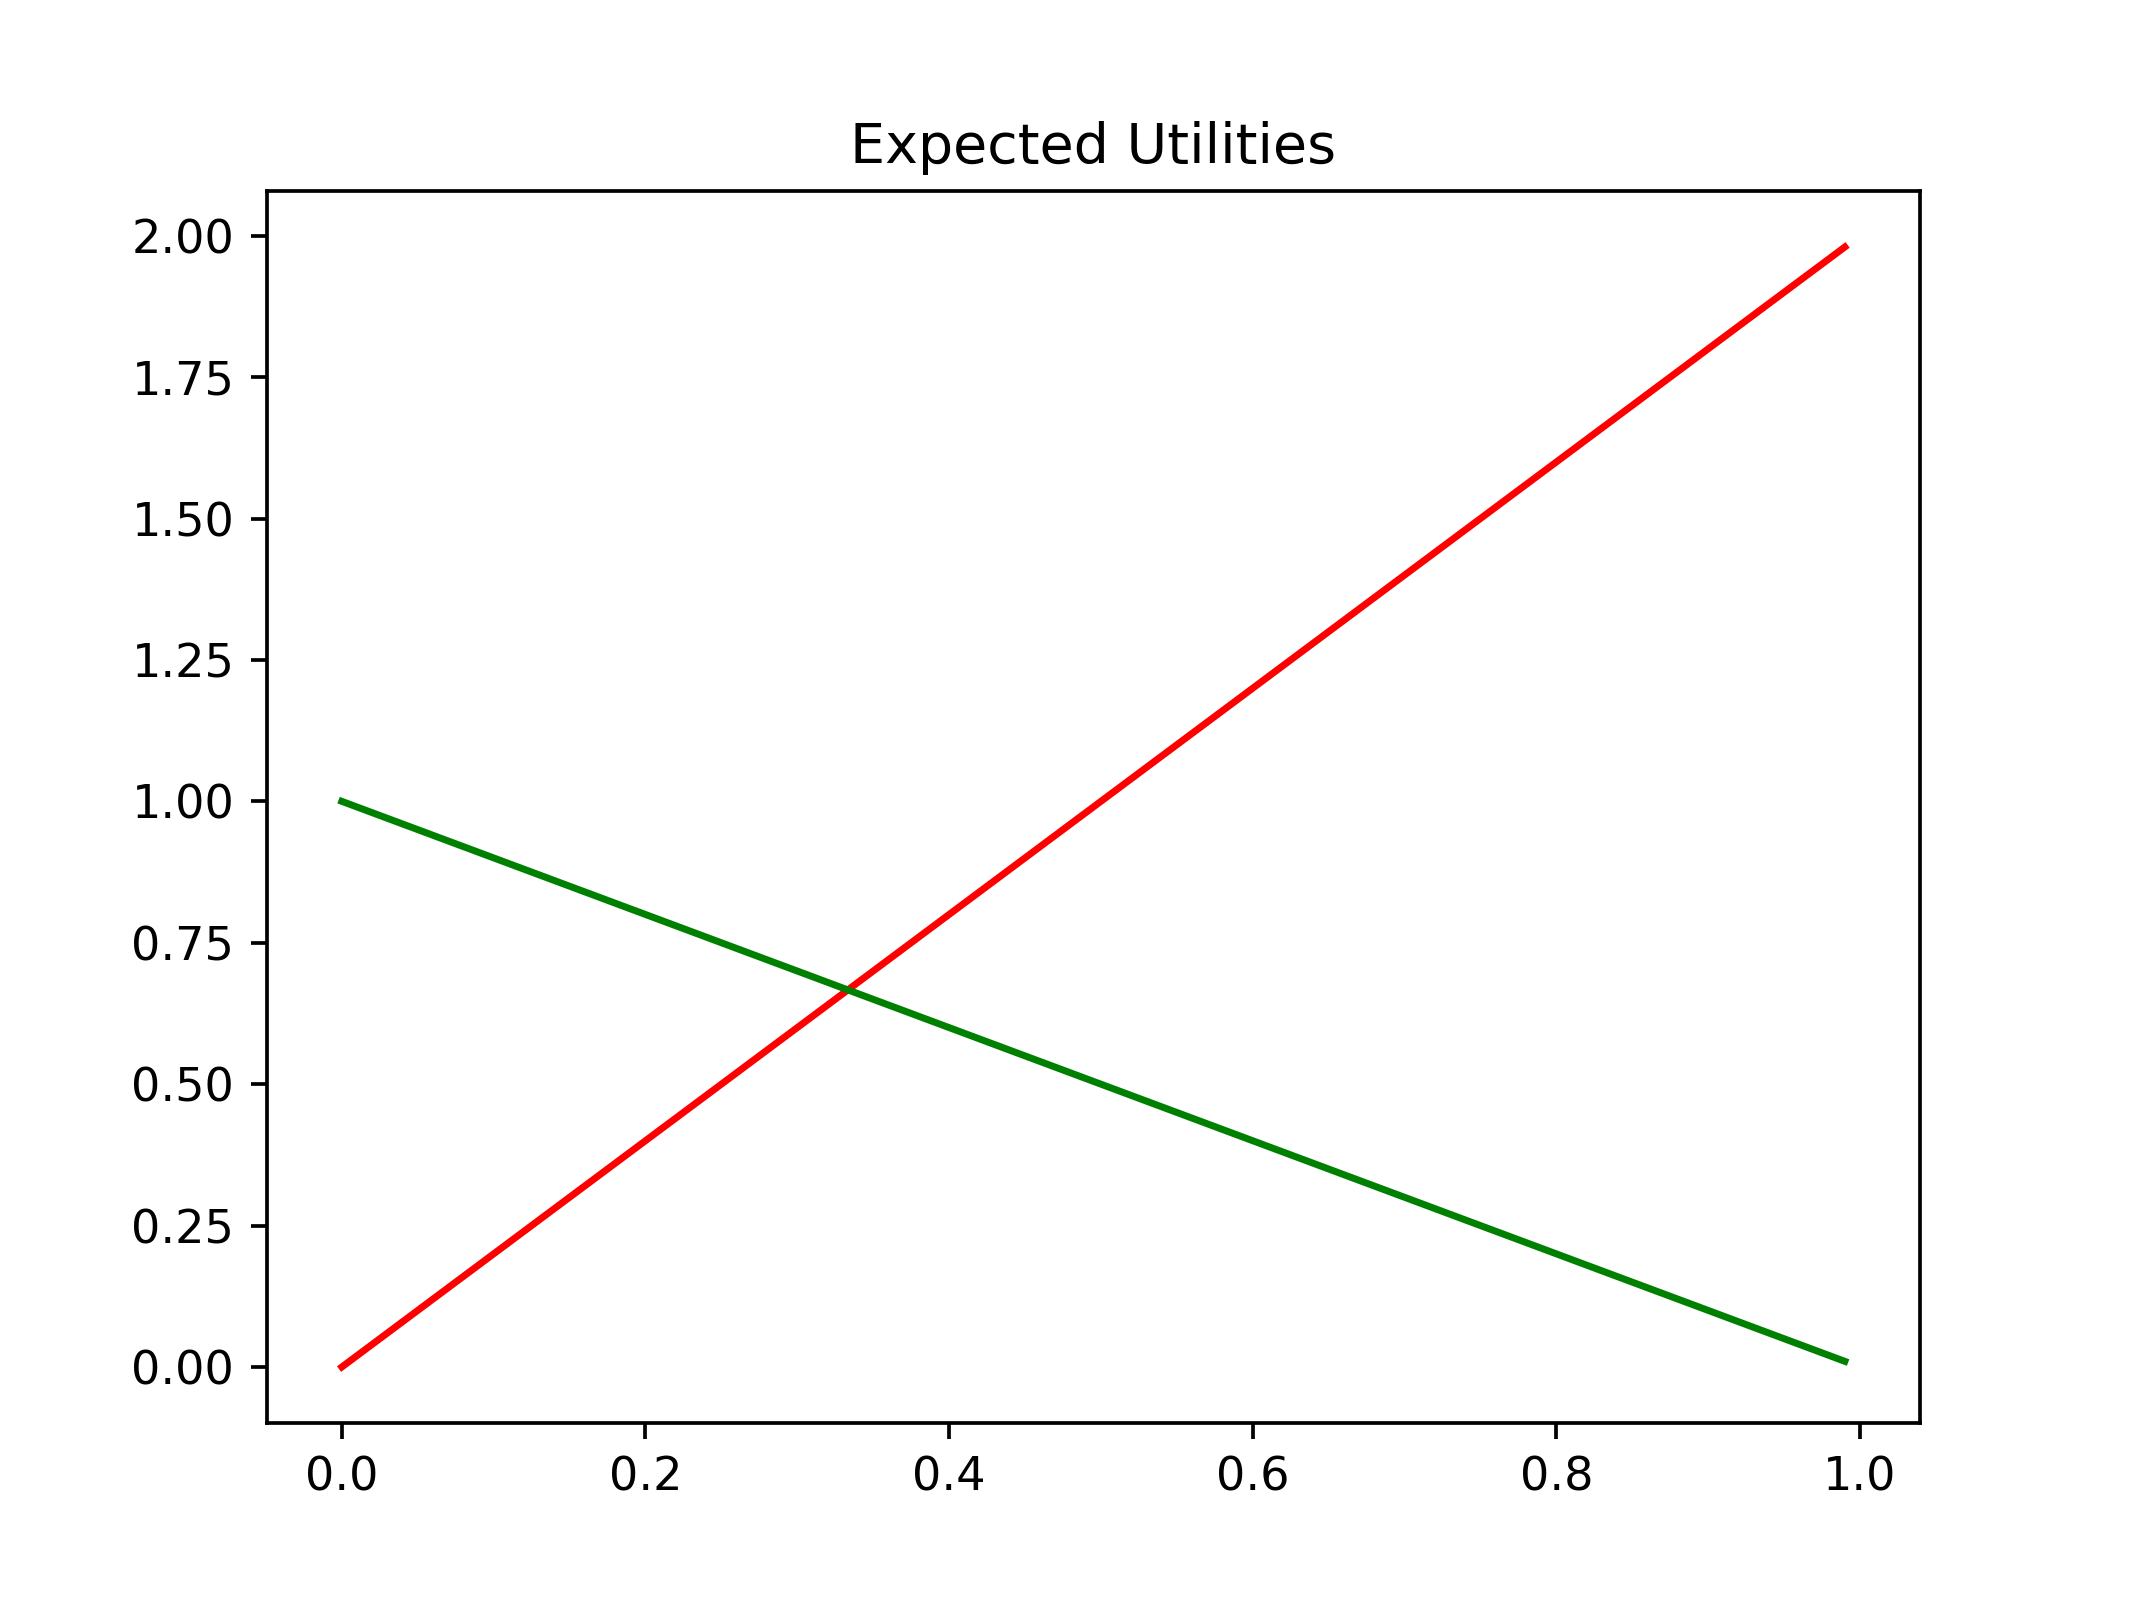

In [46]:
def doveAdam(list):
    
    result = []
    for x in list:
        new = 2 * x
        result.append(new)
        
    return result

def hawkAdam(list):
    
    result = []
    for x in list:
        new =  1 - x
        result.append(new)
    
    return result
    
dove = doveAdam(x)
hawk = hawkAdam(x)

def draw_focal_coordination(strategy1,strategy2,xAxis):
    p1, = plt.plot(xAxis,strategy1,color='r')
    p2, = plt.plot(xAxis,strategy2,color='g')
    plt.title('Expected Utilities')
   
               
draw_focal_coordination(dove,hawk,x)

plt.savefig('Fig06.png')

plt.show()

Let's try a Stag Hunt:

<img src='StagHunt.png' \>

As usual, let's let $p$ be the probability that Adam chooses to hunt stag.  We begin by analyzing what happens when Eve hunts stag:

$$ 10p \times (0 \times (1 - p)) = 10p $$

Now suppose that Eve hunts hare; here no matter what Adam does, she gets a payoff of 8; the setting them equal, we get:

$$ 10p = 8$$
$$ p = \frac{8}{10} = \frac{4}{5} = 0.8 $$ 

Let's take a look at the graph:

<IPython.core.display.Javascript object>


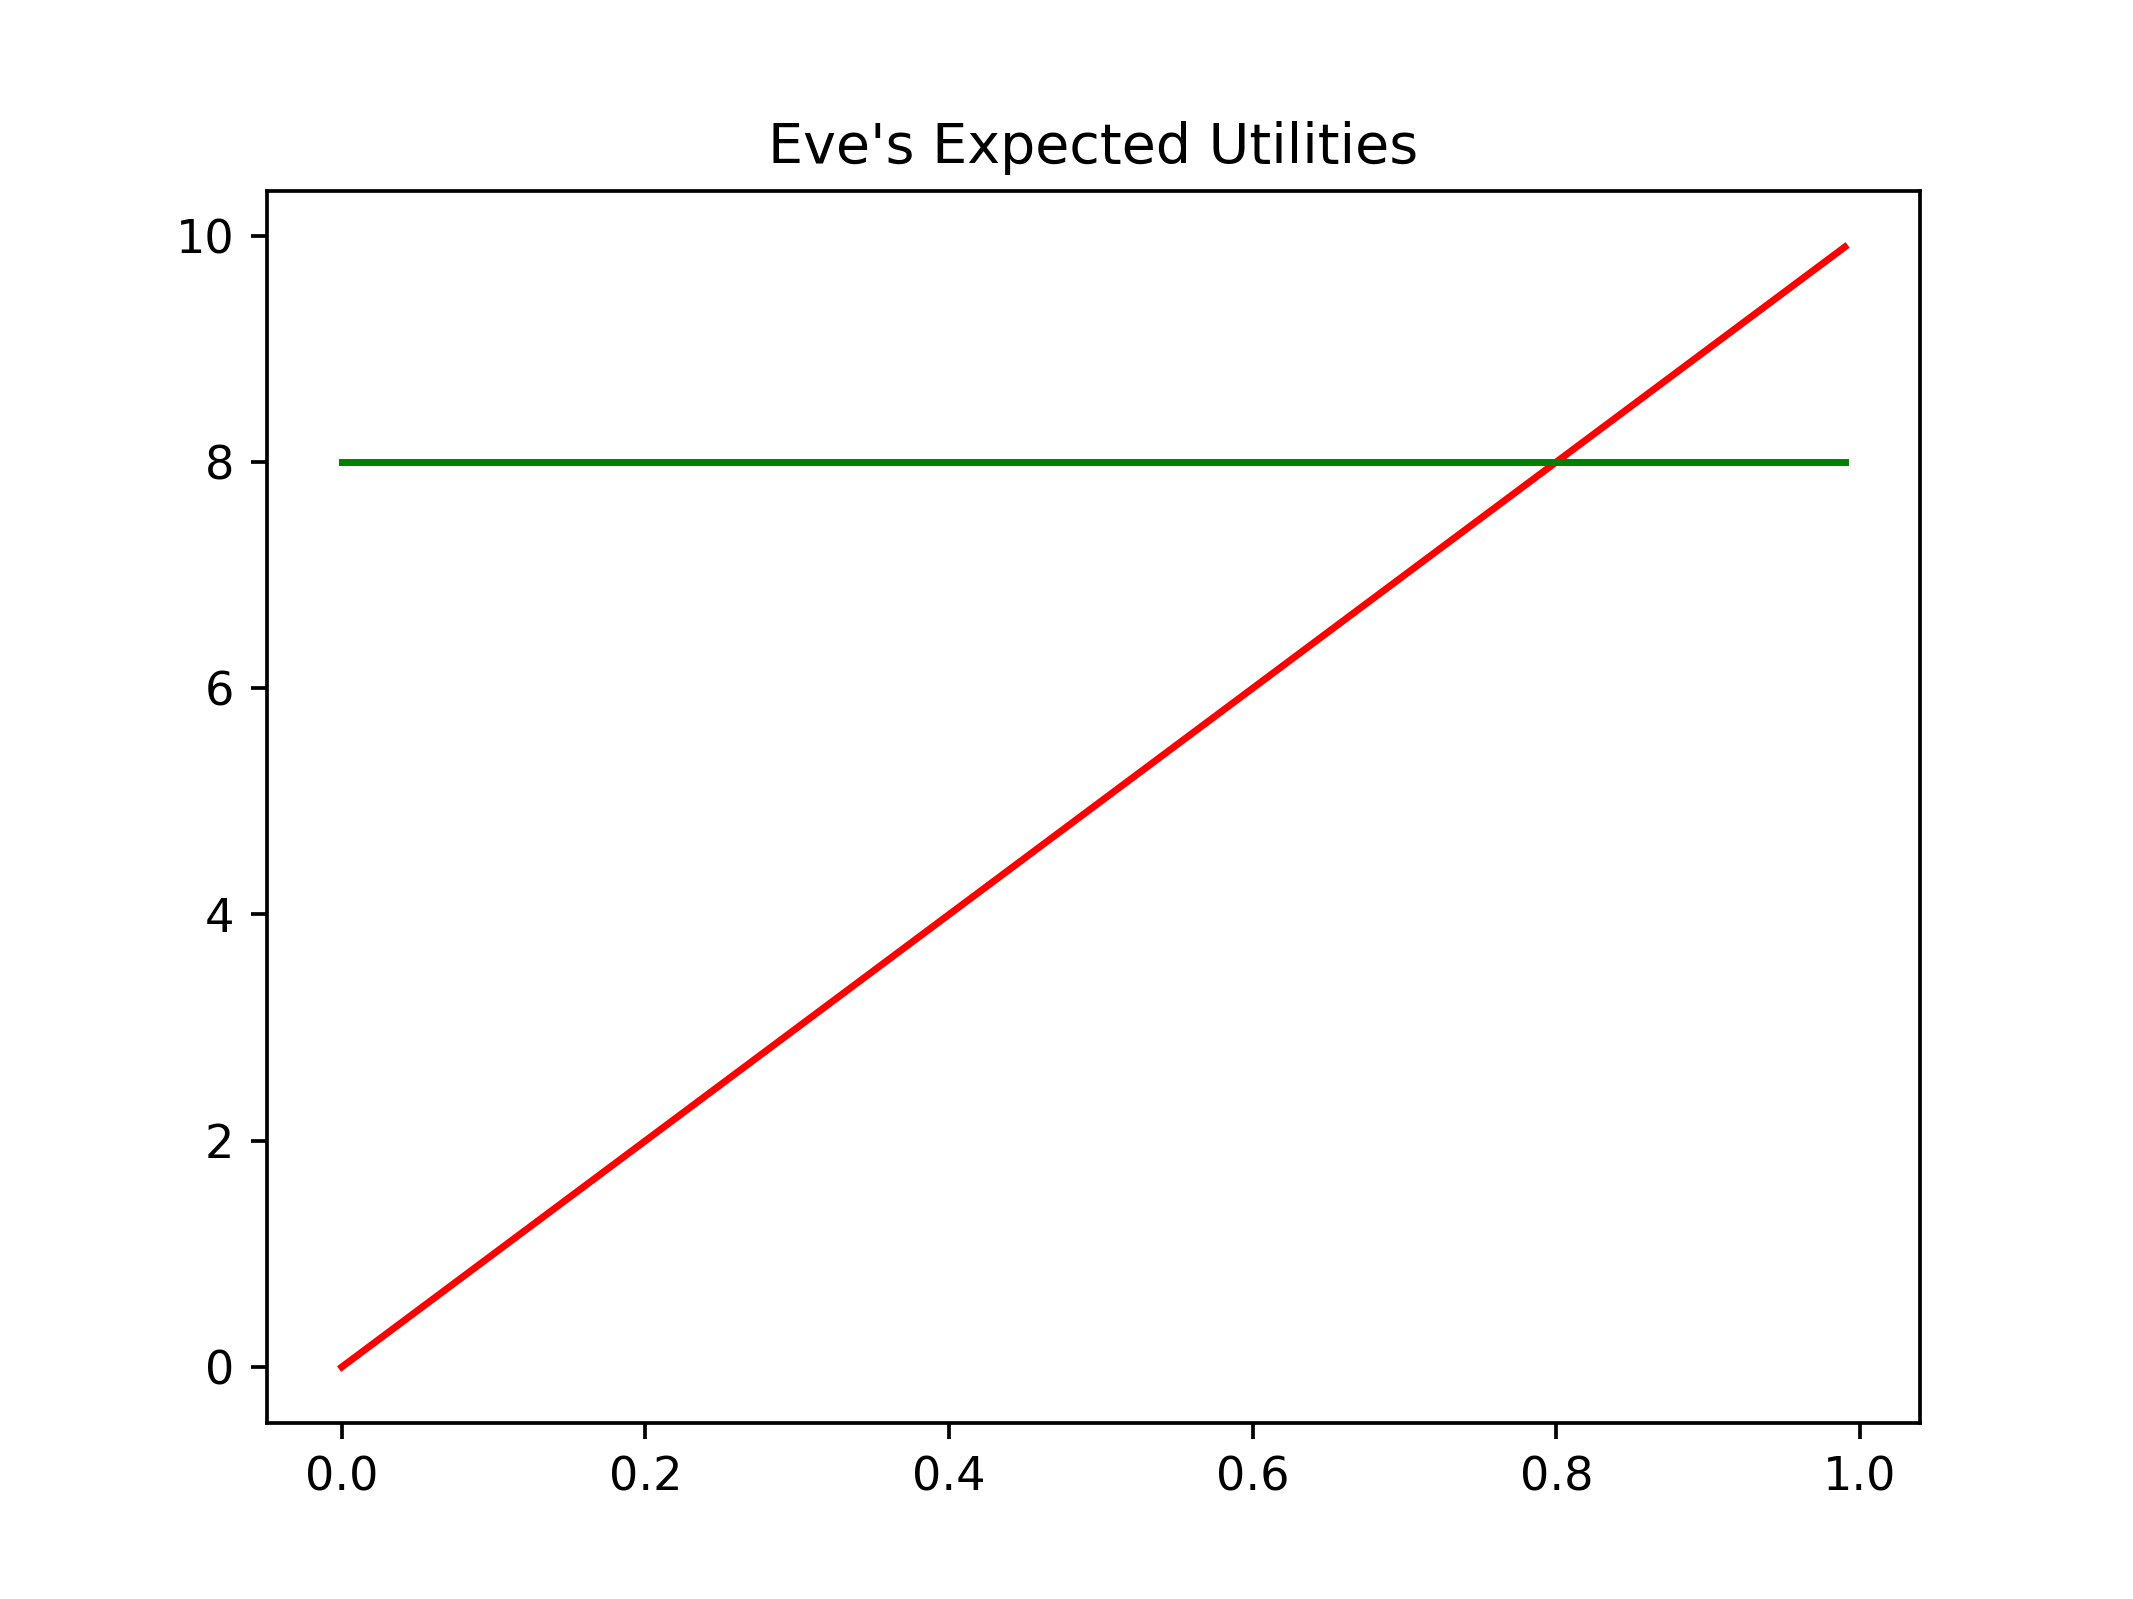

In [47]:
def hareEve(list):
    
    result = []
    for x in list:
        new = 8 
        result.append(new)
        
    return result

def stagEve(list):
    
    result = []
    for x in list:
        new =  10 * x
        result.append(new)
    
    return result
    
stag = stagEve(x)
hare = hareEve(x)

def draw_stagHunt(strategy1,strategy2,xAxis):
    p1, = plt.plot(xAxis,strategy1,color='r')
    p2, = plt.plot(xAxis,strategy2,color='g')
    plt.title("Eve's Expected Utilities")
   
               
draw_stagHunt(stag,hare,x)

plt.savefig('Fig07.png')

plt.show()

Since the option of playing __Hare__ has a payoff of 8, which is close to the payoff for __Stag__, Eve would be foolish to choose __Stag__ unless she is quite sure Adam will also pick __Stag__.  Her confidence in Adam must be greater than 80% before she should switch to playing __Stag__.  This seems right; if the payoff for __Hare__ is close to the payoff for __Stag__, I would be well-advised to stick with __Hare__ until I was quite sure that my opponent would play __Stag__ as well.

Suppose we lower the payoff for __Hare__ to 1.  We get a different result:



$$ 10p = 1 $$
$$ p = \frac{1}{10} $$

<IPython.core.display.Javascript object>


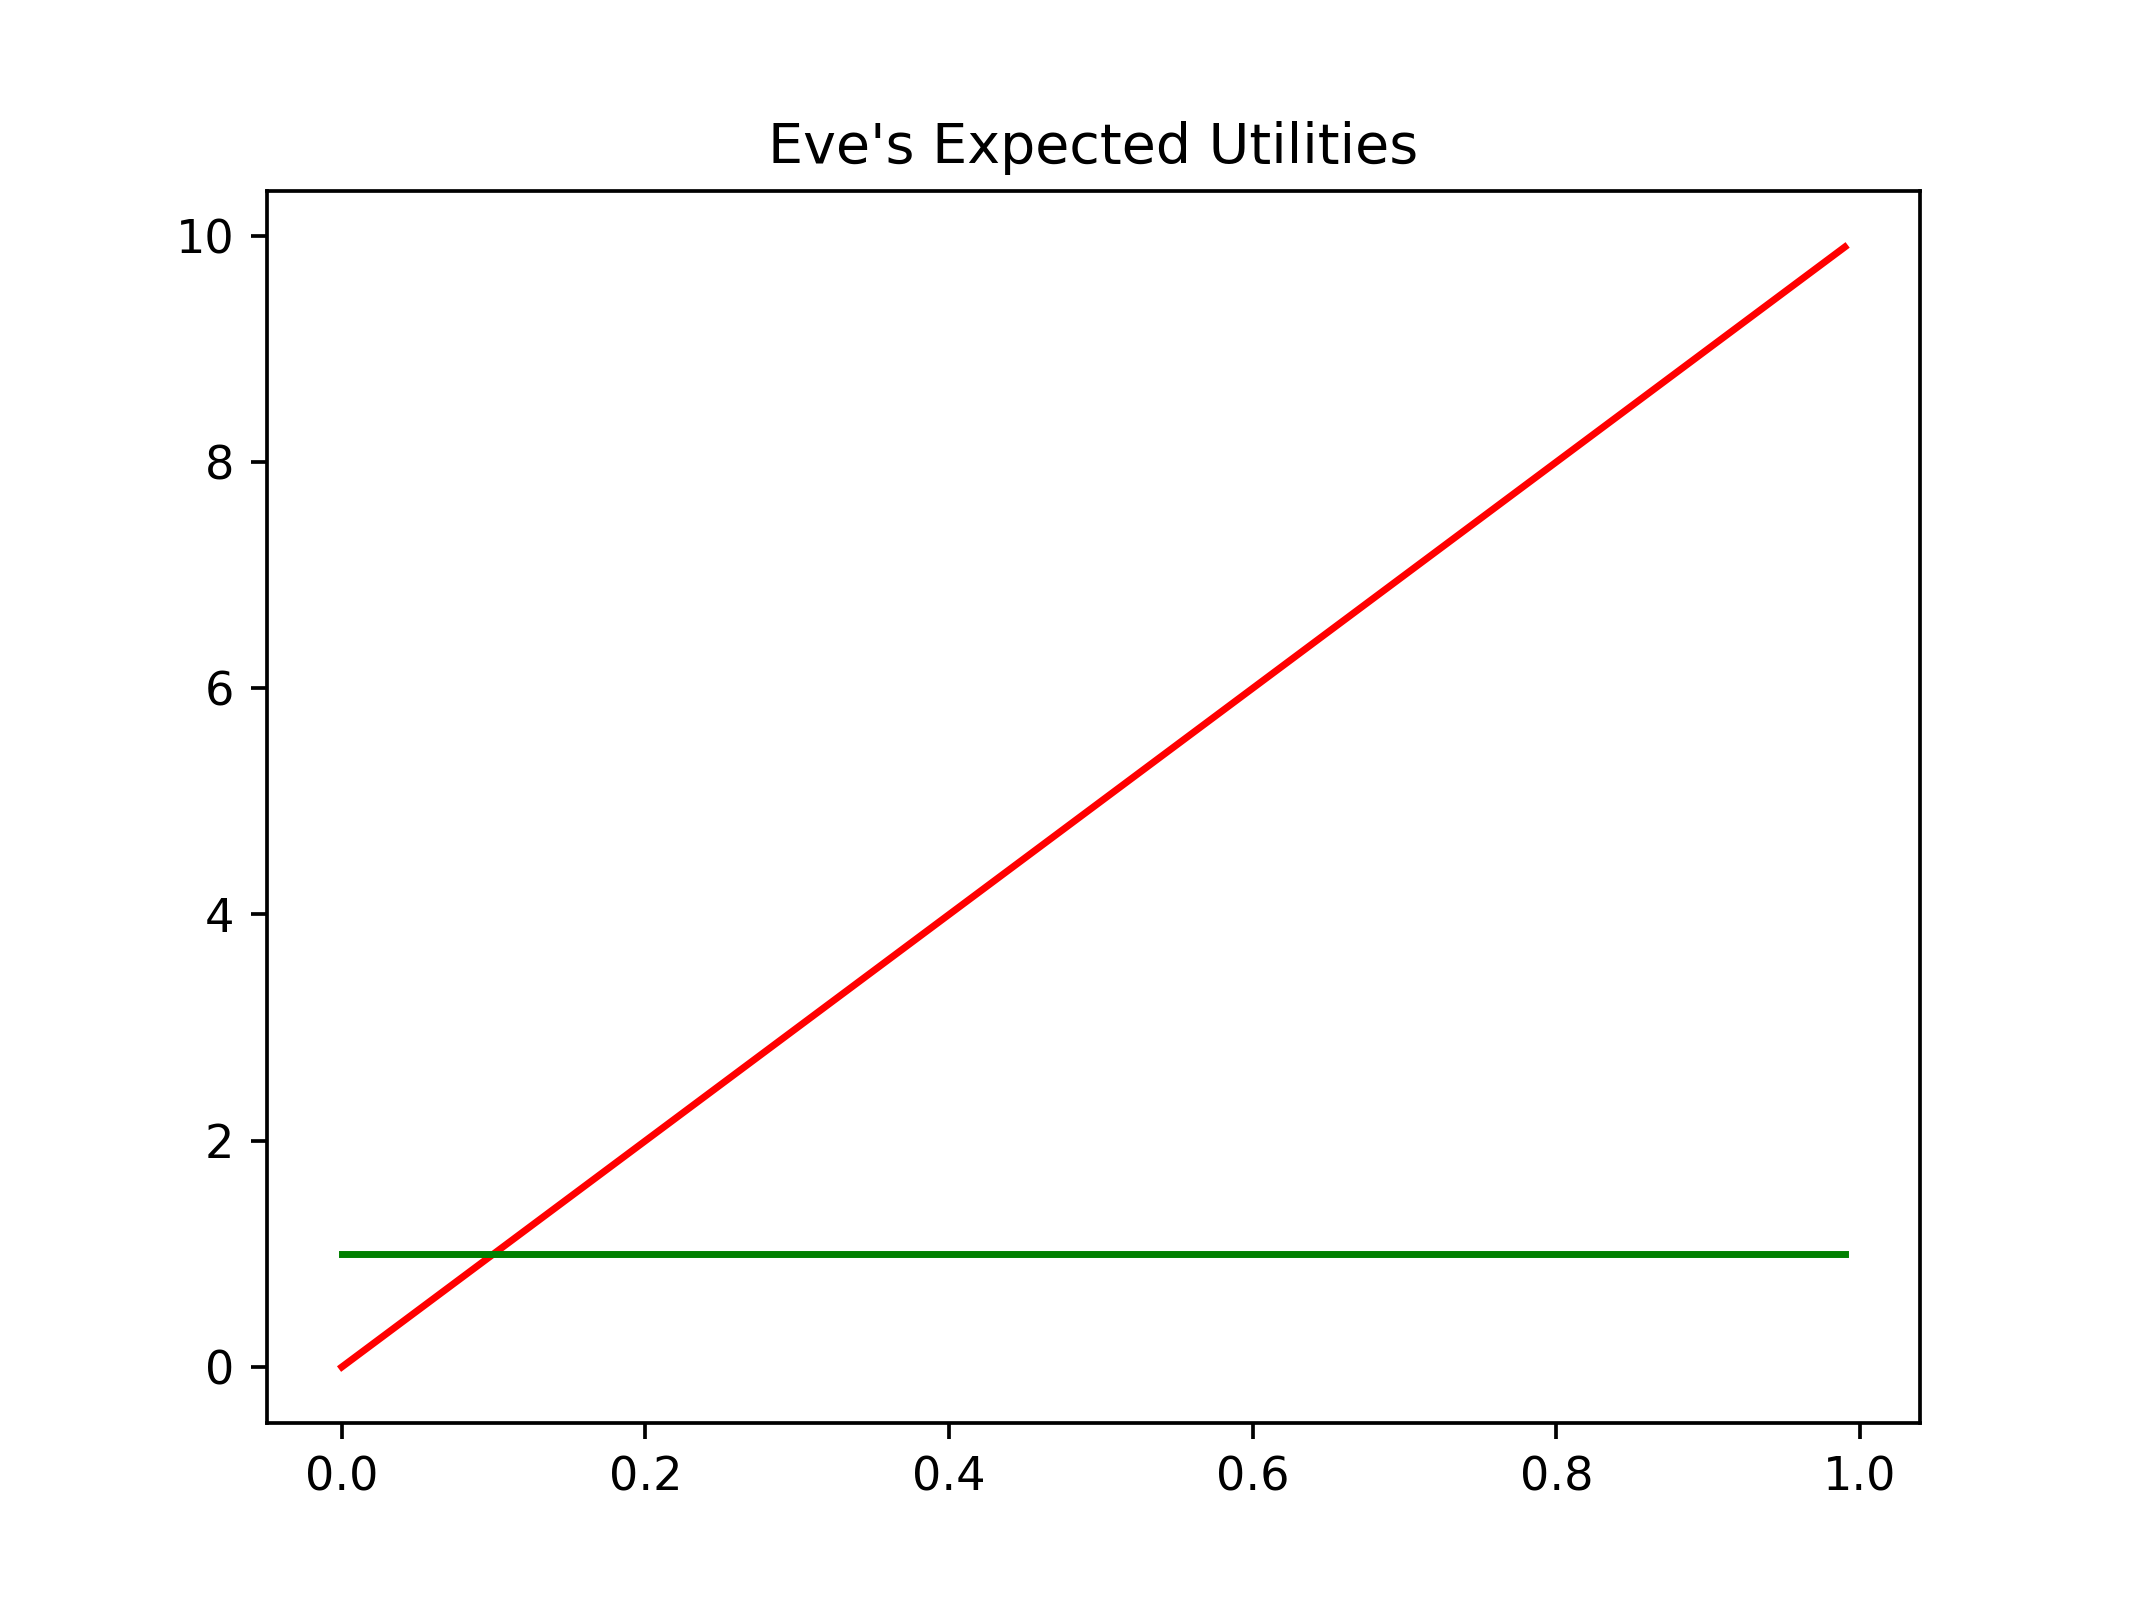

In [48]:
def hareEve(list):
    
    result = []
    for x in list:
        new = 1 
        result.append(new)
        
    return result

def stagEve(list):
    
    result = []
    for x in list:
        new =  10 * x
        result.append(new)
    
    return result
    
stag = stagEve(x)
hare = hareEve(x)

def draw_stagHunt(strategy1,strategy2,xAxis):
    p1, = plt.plot(xAxis,strategy1,color='r')
    p2, = plt.plot(xAxis,strategy2,color='g')
    plt.title("Eve's Expected Utilities")
   
               
draw_stagHunt(stag,hare,x)

plt.savefig('Fig08.png')
plt.show()


As soon as Eve's confidence that Adam will play __Stag__ is greater than 0.1, she should switch to __Stag__.

Let's play chicken.  Remember this is the game where two players aim their cars for a head-on collision.  First one to swerve loses.  Of course, if neither player swerves it's pretty bad:

<img src='chicken.png' \>

First, count the equilibria. I see two: < __Hawk__, __Dove__ > and < __Dove__, __Hawk__ >.

The problem is to find a probability mix between the pure strategy of playing __Hawk__ and the pure strategy of playing __Dove__.  

First, let's calculate the expected utility of __Hawk__, so let $p$ be the probability of playing __Hawk__:

$$ (-100 \times p) + (2 \times (1 - p)) = 2 - 102p $$

Now, let's find the expected utility of __Dove__:

$$ (-2 \times p) + (0 \times (1 - p)) = -2p $$

Next, we set them equal:

$$  2 - 102p = - 2p $$
$$ 2 = 100p $$
$$ p = \frac{1}{50} $$

In other words, a player should play __Hawk__ with probability $\frac{1}{50}$.

We're now in a position to look at some evolutionary game theory in more detail.

We'll suppose that there's species that keeps and defends territories:

1. $v$ is the value of a territory held by an individual;
2. $c$ is the cost of defending/acquiring that territory, which is paid by an individual whether or not it keeps the territory.

There are two strategies available to the species:

a. __Hawk__ always defend or try to take a territory;  
b. __Dove__ always give up territory to an individual playing __Hawk__; if two individuals playing __Dove__ meet, they flip a coin to determine who controls the territory.

We can construct the following normal form for the game:

<img src='HawksDoves.png' \>

Since there are variables in the game, we'll have to work out a variety of solutions.  

First let's suppose that $(\frac{v}{2} - c) > 0$.

Let's try to find a dominating strategy.  Suppose we know that our opponent will play __Hawk__.  If I play __Hawk__ my utility would be $\frac{v}{2} - c$; If I play __Dove__, my utility would be 0.  By our assumption above, __Hawk__ is the best reply.

Now suppose my opponent plays __Dove__.  If I play __Dove__ as well, my utility is $\frac{v}{2}$; but if I play __Hawk__ my utility is $v$.  Clearly $v$ is greater than $\frac{v}{2}$; once again __Hawk__ is the best reply.

So __Hawk__ dominates __Dove__.

Now suppose that:
    
$$ \frac{v}{2} - c < 0 $$

Letting $p$ be the probability of __Hawk__, the expected utility for __Hawk__ is:

$$ (p \times (\frac{v}{2} - c)) + (v \times (1 - p)) = \frac{pv}{2} - pc + v - pv $$

The expected utility of __Dove__ is:

$$ (0 \times p) + (1 - p) \times \frac{v}{2} = \frac{v}{2} - \frac{pv}{2} $$

Set the two sides equal:

$$ \frac{pv}{2} - pc + v - pv = \frac{v}{2} - \frac{pv}{2} $$
$$ (\frac{pv}{2} + \frac{pv}{2}) - pc + v - pv = \frac{v}{2} $$
$$ pv - pc - pv = \frac{v}{2} - v $$
$$ -pc = -\frac{v}{2} $$
$$ pc = \frac{v}{2} $$
$$ p = \frac{v}{2c} $$

So the mixed strategy equilibrium is to play __Hawk__ with probability $\frac{v}{2c}$.

So what does all this mean?  

We'll first, the case where $\frac{v}{2} - c > 0$ is just another version of a PD.  __Dove__ is strictly dominated by __Hawk__.

Next, when $\frac{v}{2} - c < 0$, the game is a version of Chicken.

Now, suppose we have a species with these two types:  Organisms playing __Hawk__ as a pure strategy and organisms playing __Dove__ as a pure strategy.  Furthermore, let's define an _evolutionarily stable strategy_ (ESS) as a strategy that cannot be invaded by another strategy.  

In the PD form of the game, __Hawk__ is an ESS.  It cannot be invaded by __Dove__.  __Dove__, on the other hand, can be invaded by __Hawk__, so it can never be an ESS.

What about the Chicken version of the game.  First, consider a population of all __Dove__s.  A single __Hawk__ could move into the population and do quite well.  But eventually, there would be so many __Hawk__s that the expected utility of playing __Hawk__ would plummet.  At that point, it might pay better to play __Dove__ since $0$ might be a better outcome than $-24$ (for example).

We might suppose that the ESS for Hawks and Doves when $c > v$ would be a mixed strategy, with neither __Hawk__s nor __Dove__s capable of taking over the entire population.  

Indeed, if the cost were high enough, the number of __Dove__s might greatly exceed the number of __Hawk__ much as the prey in an ecosystem greatly outnumbers the preditors.